LOAN APPLICATION DATASET

AIM.

    My aim is to analyse applicant loan details to predict whether a loan will be approved or not .



MAIN OBJECTIVES.

    1.Data Understanding.

    2.Data Cleaning.

    3.Filtering Data for Analysis.

    4.EDA (Univariate, Bivariate & Multivariate Analysis).

    5.Statistical Analysis.

    6.Overall Insights from Analysis.

IMPORTING LIBRARIES

    pandas(pd) - Read files.

    numpy(np) - To do mathematical operations.

    matplotlib(plt) - To make basic plots.

    seaborn(sns) - To make advanced, good-looking charts.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [56]:
loan=pd.read_csv("loan.csv")

1. Data Understanding.

     --  shape()                

     --  head()

     --  tail()                

     --  info()

     --  describe()

In [57]:
print('Initial shape:',loan.shape)

Initial shape: (367, 12)


In [58]:
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [59]:
loan.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [60]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [61]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


2. Data Cleaning.

    - Remove duplicates

    - Handle missing values

    - Fix incorrect data types

    - Standardize categorical text

    - Remove or handle outliers

    - Create new features 

In [62]:
loan.rename(columns={'ApplicantIncome':'Applicant_Income','CoapplicantIncome':'Co-applicant_Income','LoanAmount':'Loan_Amount'},inplace=True)
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Co-applicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [63]:
loan.drop("Loan_ID",axis=1,inplace=True)
loan.shape

(367, 11)

In [64]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [65]:
loan['Dependents'] = loan['Dependents'].replace('3+', 3)

In [66]:
loan['Credit_History'] = loan['Credit_History'].map({1: 'Good', 0: 'Bad'})

In [67]:
loan['Gender'] = loan['Gender'].replace({'male': 'Male', 'M': 'Male', 'female': 'Female', 'F': 'Female'})

loan['Married'] = loan['Married'].replace({'Y': 'Yes', 'yes': 'Yes', 'N': 'No', 'no': 'No'})

In [68]:
loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Good,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Good,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Good,Urban


HANDLING MISSING VALUES

In [69]:
loan.isnull().sum().sum()

np.int64(84)

In [70]:
loan.isnull().sum()

Gender                 11
Married                 0
Dependents             10
Education               0
Self_Employed          23
Applicant_Income        0
Co-applicant_Income     0
Loan_Amount             5
Loan_Amount_Term        6
Credit_History         29
Property_Area           0
dtype: int64

FILLING NAN VALUES USING MODE AND MEDIAN

In [71]:
#Categorical columns
c = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
loan[c] = loan[c].apply(lambda x: x.fillna(x.mode()[0]))

#Numeric columns
n = ['Applicant_Income', 'Co-applicant_Income', 'Loan_Amount', 'Loan_Amount_Term']
loan[n] = loan[n].apply(lambda x: x.fillna(x.median()))

In [72]:
loan.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Co-applicant_Income    0
Loan_Amount            0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64


FIXING DATATYPES.




In [73]:
loan['Dependents'] = loan['Dependents'].astype(int)
loan['Applicant_Income'] = (loan['Applicant_Income']*1000).astype(int)
loan['Co-applicant_Income'] = (loan['Co-applicant_Income'] *1000).astype(int)
loan['Loan_Amount'] = (loan['Loan_Amount']*1000).astype(int)
loan['Loan_Amount_Term'] = (loan['Loan_Amount_Term']/12).astype(int)

FINAL OVERVIEW OF THE DATASET

In [74]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720000,0,110000,30,Good,Urban
1,Male,Yes,1,Graduate,No,3076000,1500000,126000,30,Good,Urban
2,Male,Yes,2,Graduate,No,5000000,1800000,208000,30,Good,Urban
3,Male,Yes,2,Graduate,No,2340000,2546000,100000,30,Good,Urban
4,Male,No,0,Not Graduate,No,3276000,0,78000,30,Good,Urban


In [75]:
loan.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
362,Male,Yes,3,Not Graduate,Yes,4009000,1777000,113000,30,Good,Urban
363,Male,Yes,0,Graduate,No,4158000,709000,115000,30,Good,Urban
364,Male,No,0,Graduate,No,3250000,1993000,126000,30,Good,Semiurban
365,Male,Yes,0,Graduate,No,5000000,2393000,158000,30,Good,Rural
366,Male,No,0,Graduate,Yes,9200000,0,98000,15,Good,Rural


In [76]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               367 non-null    object
 1   Married              367 non-null    object
 2   Dependents           367 non-null    int64 
 3   Education            367 non-null    object
 4   Self_Employed        367 non-null    object
 5   Applicant_Income     367 non-null    int64 
 6   Co-applicant_Income  367 non-null    int64 
 7   Loan_Amount          367 non-null    int64 
 8   Loan_Amount_Term     367 non-null    int64 
 9   Credit_History       367 non-null    object
 10  Property_Area        367 non-null    object
dtypes: int64(5), object(6)
memory usage: 31.7+ KB


STATISTICAL ANALYSIS

In [77]:
loan.describe()

,Dependents,Applicant_Income,Co-applicant_Income,Loan_Amount,Loan_Amount_Term
count,367.000000,3.670000e+02,3.670000e+02,367.000000,367.000000
mean,0.806540,4.805599e+06,1.569578e+06,135980.926431,28.566757
std,1.065177,4.910685e+06,2.334232e+06,60959.739166,5.395332
min,0.000000,0.000000e+00,0.000000e+00,28000.000000,0.000000
25%,0.000000,2.864000e+06,0.000000e+00,101000.000000,30.000000
50%,0.000000,3.786000e+06,1.025000e+06,125000.000000,30.000000
75%,2.000000,5.060000e+06,2.430500e+06,157500.000000,30.000000
max,3.000000,7.252900e+07,2.400000e+07,550000.000000,40.000000


In [78]:
print("Mean values:\n", loan.mean(numeric_only=True))

Mean values:
 Dependents             8.065395e-01
Applicant_Income       4.805599e+06
Co-applicant_Income    1.569578e+06
Loan_Amount            1.359809e+05
Loan_Amount_Term       2.856676e+01
dtype: float64


In [79]:
print("\nMedian values:\n", loan.median(numeric_only=True))


Median values:
 Dependents                   0.0
Applicant_Income       3786000.0
Co-applicant_Income    1025000.0
Loan_Amount             125000.0
Loan_Amount_Term            30.0
dtype: float64


In [80]:
print("\nMode values:\n", loan.mode().iloc[0])


Mode values:
 Gender                     Male
Married                     Yes
Dependents                  0.0
Education              Graduate
Self_Employed                No
Applicant_Income        3500000
Co-applicant_Income         0.0
Loan_Amount            125000.0
Loan_Amount_Term           30.0
Credit_History             Good
Property_Area             Urban
Name: 0, dtype: object


FINDING OUTLIERS

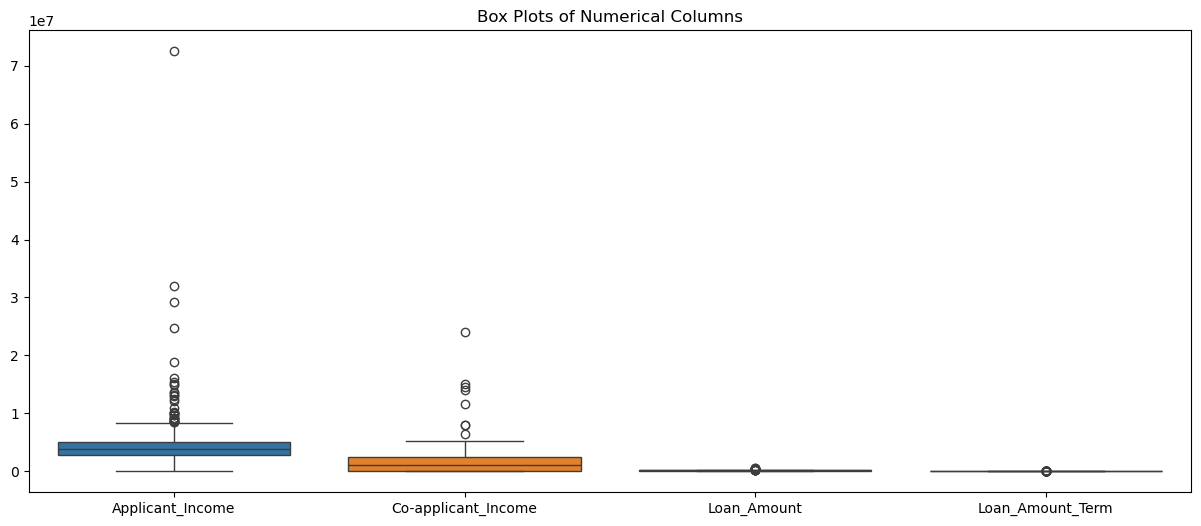

In [81]:
numerical_cols = ['Applicant_Income','Co-applicant_Income','Loan_Amount','Loan_Amount_Term']
plt.figure(figsize=(15, 6))
sns.boxplot(data=loan[numerical_cols])
plt.title('Box Plots of Numerical Columns')
plt.xticks()
plt.show()

APPLICANT_INCOME & CO-APPLICANT_INCOME
        
        -- These columns are not evenly distributed.
        
        -- The box is pushed to the bottom, and the whiskers are short, but there is a long tail of scattered points.
        
        -- This indicates that most people have low to average income and small number of individuals have extremely high incomes.
    
        -- The numerous single dots above the main plot for both income columns are outliers.
        
        -- These are data points that are far outside the normal range.

LOAN_AMOUNT & LOAN_AMOUNT_TERM
    
        -- These columns are evenly spread and balanced.
        
        -- The box is in the center and the data is tightly grouped.
    
        -- The single dots shows that there are very few or no outliers.
        
        -- Most people take similar loan amounts and have a similar loan terms. 
        
        -- This means the data is clean and consistent.


Removing outliers.


In [82]:
for col in numerical_cols:
    
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    loan[col]=np.where (loan[col]<lower_bound,lower_bound,
                       np.where(loan[col]>upper_bound,upper_bound,loan[col]))

print("Shape after outlier removal:", loan.shape)

Shape after outlier removal: (367, 11)


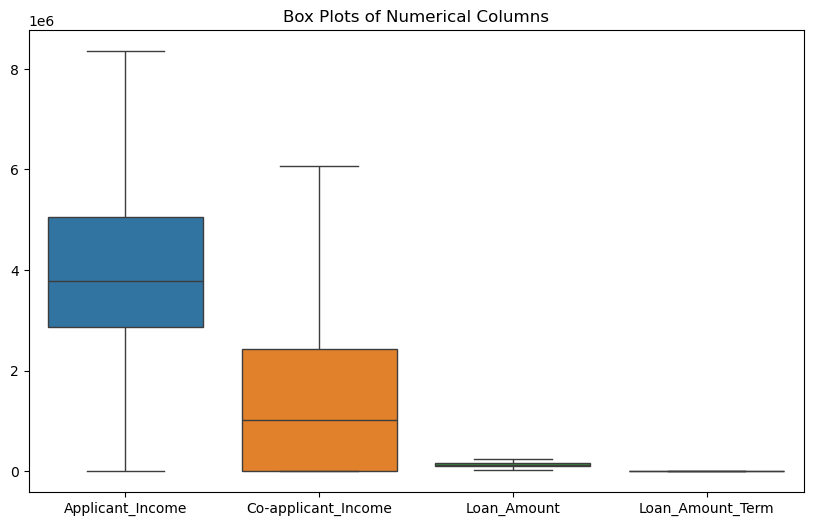

(367, 11)

In [83]:
numerical_cols = ['Applicant_Income','Co-applicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan[numerical_cols])
plt.title('Box Plots of Numerical Columns')
plt.xticks()
plt.show()
loan.shape

Applicant_Income.

    -- The tall box and long whiskers indicates that this column has high degree of variability.
    
    -- The line inside the box is called median and is located at the lower end. 
    
    -- It is right-skewed distribution. 
    
    -- This chart represents large number of applicants have low incomes, while a smaller number of applicants have higher incomes. 
    
    -- The long upper whisker indicates a wide range of values and the presence of outliers.

Co-Applicant_Income.

    -- This column is also right-skewed. 
    
    -- The median is very low and the box is much smaller than Applicant_Income.
    
    -- This suggests that most co-applicants have a low income and the income variability among co-applicants is less than that of the applicants.
    
    -- The long upper whisker again implies the existence of higher-income individuals.

LOAN_AMOUNT.

    -- This column shows a tightly clustered distribution with very low variability. 
    
    -- The box is very small, indicating that most of the data falls within a narrow range.
    
    -- The median is located near the center of the box, suggesting a symmetrical distribution.
    
    -- This indicates that most loans in the dataset are for a similar amount.
    
    -- The short whiskers confirm that there are very few extreme values or outliers.

LOAN_AMOUNT_TERM.

    -- This column has an extremely tight and consistent distribution.
    
    -- The box is almost a single line with very short whiskers. 
    
    -- This implies that almost loan terms are same for everyone.
    
    -- The data has no variability.

CREATING NEW COLUMNS

In [84]:
loan['Total_Income'] = loan['Applicant_Income'] + loan['Co-applicant_Income']
loan['EMI'] = (loan['Loan_Amount'] / loan['Loan_Amount_Term'])

FIXING DATA TYPES.

In [85]:
loan['Applicant_Income']=loan['Applicant_Income'].astype(int)
loan['Co-applicant_Income']=loan['Co-applicant_Income'].astype(int)
loan['Loan_Amount']=loan['Loan_Amount'].astype(int)
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].astype(int)
loan['Total_Income']=loan['Total_Income'].astype(int)
loan['EMI']=loan['EMI'].astype(int) 

In [86]:
loan.info()
loan.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               367 non-null    object
 1   Married              367 non-null    object
 2   Dependents           367 non-null    int64 
 3   Education            367 non-null    object
 4   Self_Employed        367 non-null    object
 5   Applicant_Income     367 non-null    int64 
 6   Co-applicant_Income  367 non-null    int64 
 7   Loan_Amount          367 non-null    int64 
 8   Loan_Amount_Term     367 non-null    int64 
 9   Credit_History       367 non-null    object
 10  Property_Area        367 non-null    object
 11  Total_Income         367 non-null    int64 
 12  EMI                  367 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 37.4+ KB


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI
0,Male,Yes,0,Graduate,No,5720000,0,110000,30,Good,Urban,5720000,3666
1,Male,Yes,1,Graduate,No,3076000,1500000,126000,30,Good,Urban,4576000,4200
2,Male,Yes,2,Graduate,No,5000000,1800000,208000,30,Good,Urban,6800000,6933


EXPLORATORY DATA ANALYSIS (EDA)

UNIVARIATE ANALYSIS

HISTOGRAM

In [87]:
loan[['Applicant_Income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Applicant_Income  367 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [88]:
loan[['Applicant_Income']].describe()

,Applicant_Income
count,3.670000e+02
mean,4.238965e+06
std,1.950976e+06
min,0.000000e+00
25%,2.864000e+06
50%,3.786000e+06
75%,5.060000e+06
max,8.354000e+06


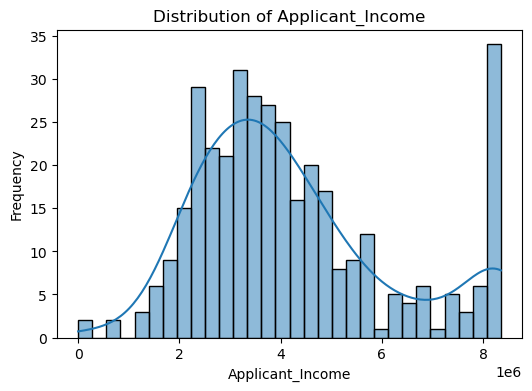

In [89]:
plt.figure(figsize=(6, 4))
sns.histplot(loan['Applicant_Income'], bins=30, kde=True)
plt.title(f'Distribution of {'Applicant_Income'}')
plt.xlabel('Applicant_Income')
plt.ylabel('Frequency')
plt.show()

INSIGHTS.

    -- Q1 (25th Percentile – Low-Income Group)   -> 25% of applicants fall below Q1
    
    -- Q2 (50th Percentile – Median Income)      -> 50% of applicants earn below this value and 50% earn above it.
    
    -- Q3 (75th Percentile – High-Income Group)  -> 75% of applicants fall below Q3 and the top 25% are high-income applicants.

BOX PLOT

In [90]:
loan[['Co-applicant_Income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Co-applicant_Income  367 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [91]:
loan[['Co-applicant_Income']].describe()

,Co-applicant_Income
count,3.670000e+02
mean,1.425501e+06
std,1.600086e+06
min,0.000000e+00
25%,0.000000e+00
50%,1.025000e+06
75%,2.430500e+06
max,6.076250e+06


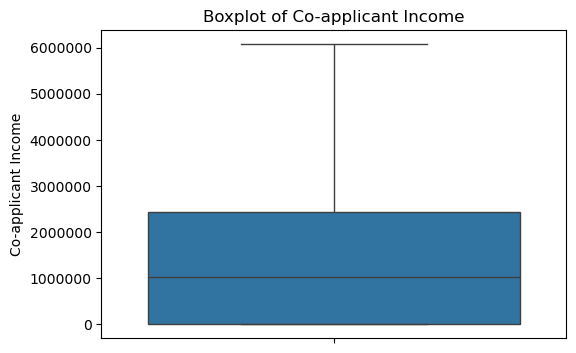

In [92]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=loan['Co-applicant_Income'])
plt.title('Boxplot of Co-applicant Income')
plt.ylabel('Co-applicant Income')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

CoapplicantIncome.

    -- The middle line (median) of Co-applicant Income is around 1 million which means half of the co-applicants earn below this amount and half earn above.

    -- Most co-applicants have incomes between zero and around 2.5 million

    -- The longer whisker (upper side) suggests that smaller number of co-applicants have very high incomes compared to the rest.


VIOLIN PLOT

In [93]:
loan[['Loan_Amount']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Loan_Amount  367 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [94]:
loan[['Loan_Amount']].describe()

,Loan_Amount
count,367.000000
mean,131957.765668
std,46926.185216
min,28000.000000
25%,101000.000000
50%,125000.000000
75%,157500.000000
max,242250.000000


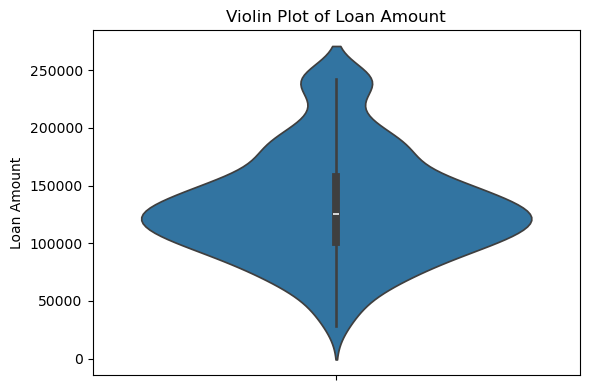

In [95]:
plt.figure(figsize=(6, 4))
sns.violinplot(y=loan['Loan_Amount'])
plt.title('Violin Plot of Loan Amount')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()


LOAN AMOUNT.

    -- The middle point is around 120,000 which means half of the applicants have loans below this value and half above.
    
    -- The violin is wider at the 100,000–150,000 range, showing that most applicants requested loan amounts in this range.

    -- Narrower regions indicate fewer applicants in those loan ranges.

    -- The distribution shows two bulges — one around 1,20,000 and another near 2,30,000.

    -- This suggests that there are two common loan sizes.

    -- The upper tail suggests a few applicants requested very high loan amounts.

BIVARIATE ANALYSIS

SCATTER PLOT

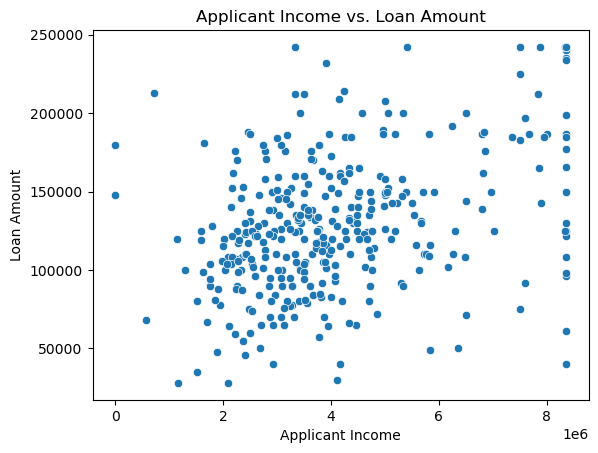

In [96]:
sns.scatterplot(x='Applicant_Income', y='Loan_Amount', data=loan)
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

INSIGHTS

    -- Most applicants earn between 1 million to 5 million and their loan amounts are usually between 75K and 150K. 
    
    -- This indicates that the majority of loan seekers belong to the middle-income group.
    
    -- As applicant income increases, loan amount tends to increase slightly but not strongly.
    
    -- This could be because banks don’t give loans based only on income they also look at things like property value, repayment time and credit score.

BOX PLOT

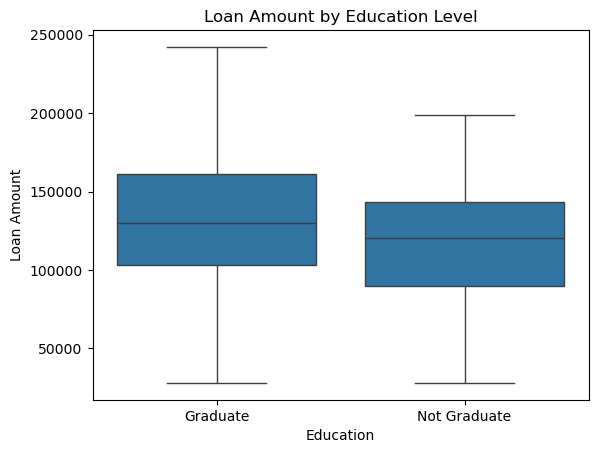

In [97]:
sns.boxplot(x='Education', y='Loan_Amount', data=loan)
plt.title('Loan Amount by Education Level')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

INSIGHTS

    -- The chart shows that the median loan amount is similar for both graduates and non-graduates.
    
    -- However, the distribution of loan amount for graduates is more spread out as indicated by the larger box and more numerous outliers.
    
    -- This suggests that while the average loan amounts are similar, graduates tend to have a wider range of loan amounts compared to non-graduates.

MULTIVARIATE ANALYSIS

HEATMAP

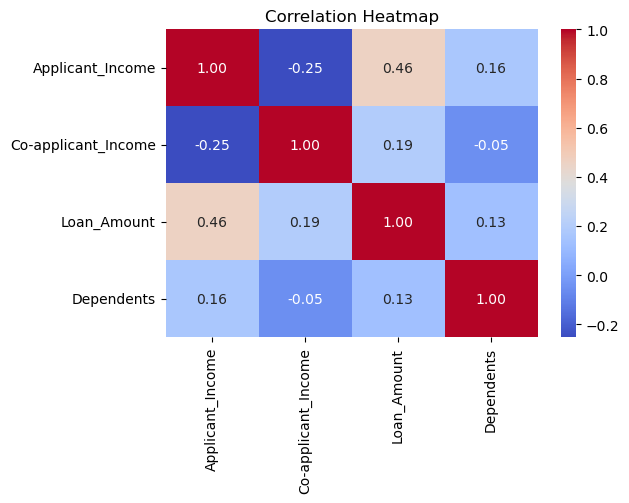

In [98]:
numerical_cols = ['Applicant_Income', 'Co-applicant_Income', 'Loan_Amount', 'Dependents']
corr_matrix = loan[numerical_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

INSIGHTS

    -- Applicant's Income and Loan Amount: There is a strong positive link (0.46). This indicates that as an applicant's income increases, the requested loan amount also tends to increase. 

    -- Co-applicant's Income and Loan Amount: Co-applicant Income has a positive correlation with loan amount (0.19), which is weaker than the applicant's income but still shows that a higher co-applicant income is associated with a larger loan.

    -- Dependents and Income: Correlation between ApplicantIncome and Dependents is 0.16. This suggests that applicants with more dependents tend to have a higher income.

    -- Co-applicant's Income and Dependents: A negative correlation exists between th (−0.05). This implies that as the number of dependents increases, the co-applicant's income tends to slightly decrease.

PAIRPLOT

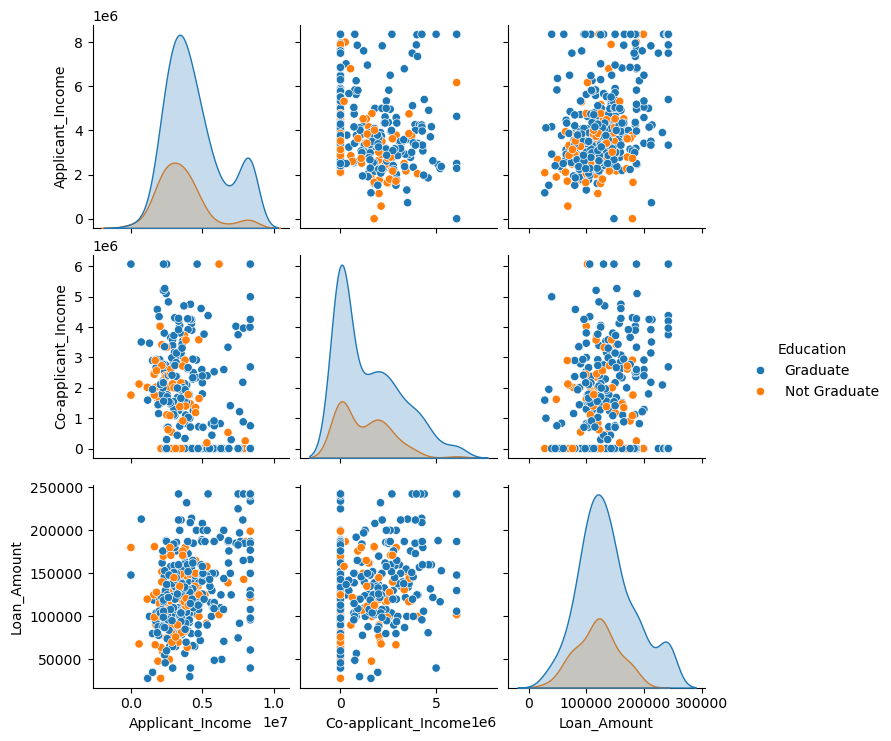

In [99]:
sns.pairplot(loan,vars=['Applicant_Income','Co-applicant_Income','Loan_Amount'], hue='Education')
plt.show()

INSIGHTS

    -- Education strongly affects applicant income – graduates earn more.

    -- Loan amounts are higher for graduates compared to non-graduates.

    -- Applicant income is positively related to loan amount, especially for graduates.

    -- Co-applicant income is less influenced by education and shows weaker relation to loan amount.

    -- Graduates have a financial advantage in loan approvals due to higher incomes and higher loan eligibility.

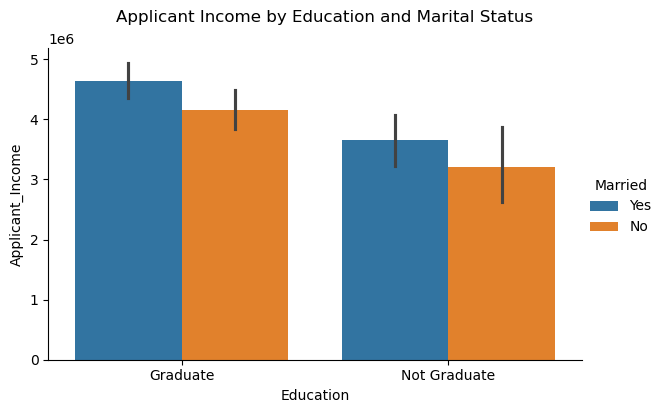

In [100]:
g = sns.catplot(x='Education', y='Applicant_Income', hue='Married', kind='bar', data=loan, height=4, aspect=1.5)
g.fig.suptitle('Applicant Income by Education and Marital Status', y=1.02)
plt.show()

Insights

1. Income and Education:
        For both married and unmarried applicants, graduates have a slightly higher average income than non-graduates.

2. Marital Status and Income:
        Across both education levels, married applicants have a significantly higher average income than unmarried applicants. 

3. Combined Insight:
        The highest average income is found among married graduates, followed by married non-graduates, unmarried graduates, and finally unmarried non-graduates.

HYPOTHESIS TESTING

T-TEST

--> HYPOTHESIS:

     NULL HYPOTHESIS (H₀): Male and Female applicants have same average incomes.
     
     ALTERNATIVE HYPOTHESIS (H₀): Male and Female applicants have different average incomes. 


In [101]:
from scipy.stats import ttest_ind

male_income = loan[loan['Gender'] == 'Male']['Applicant_Income']
female_income = loan[loan['Gender'] == 'Female']['Applicant_Income']

t_stat, p_value = ttest_ind(male_income, female_income, equal_var=False)  # Welch’s T-test
print("T-test Result:")
print(f"T-statistic :{ t_stat:.2f} , p-value :{ p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is significant difference in Applicant Income between Male and Female applicants.")
else:
    print("Fail to Reject H₀: There is no significant difference in Applicant Income between Male and Female applicants.")


T-test Result:
T-statistic :1.56 , p-value :0.1211
Fail to Reject H₀: There is no significant difference in Applicant Income between Male and Female applicants.


In [102]:
group_stats = loan.groupby('Gender')['Applicant_Income'].agg(['mean', 'std', 'count'])
print("Group Statistics:\n", group_stats)

Group Statistics:
                 mean           std  count
Gender                                   
Female  3.917771e+06  1.900635e+06     70
Male    4.314667e+06  1.958116e+06    297


ANOVA TEST

-->HYPOTHESIS:

     NULL HYPOTHESIS (H₀): Average income of graduates and non-graduates is the same.
     
     ALTERNATIVE HYPOTHESIS (H₀): Average income of graduates and non-graduates are not same.

In [103]:
from scipy.stats import f_oneway

graduate_income = loan[loan['Education'] == 'Graduate']['Applicant_Income'].dropna()
not_graduate_income = loan[loan['Education'] == 'Not Graduate']['Applicant_Income'].dropna()

anova_stat, anova_p = f_oneway(graduate_income, not_graduate_income)
print("ANOVA Result:")
print(f"F-statistic: {anova_stat:.2f}, p-value: {anova_p:.4f}")

if anova_p < 0.05:
    print("Reject H₀: There is significant difference in Applicant Income across Education levels.")
else:
    print("Fail to Reject H₀: There is no significant difference in Applicant Income across Education levels.")


ANOVA Result:
F-statistic: 15.83, p-value: 0.0001
Reject H₀: There is significant difference in Applicant Income across Education levels.


In [104]:
group_stats = loan.groupby('Education')['Applicant_Income'].agg(['mean', 'std', 'count'])
print("Group Statistics:\n", group_stats)

Group Statistics:
                       mean           std  count
Education                                      
Graduate      4.455346e+06  1.978988e+06    283
Not Graduate  3.509964e+06  1.667530e+06     84


Overall Conclusion:

    -- Applicants with higher income and graduates usually earn more.
    
    -- Gender does not make a big difference in income.
    
    -- Loan amount increases slightly with income, but banks also look at other factors before giving loans.